<a href="https://colab.research.google.com/github/Oskarino/Lab4_PTD/blob/main/Lab4_PTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import math
from functools import partial
from math import sin, cos, pi, sqrt, log
from scipy.fft import fft
import time

In [2]:
#czestotliwosc probkowania
f_s = 8000
#przesuniecie w fazie
phi = pi/120

#funkcja pomocnaicza dla skali decybelowej
def table_log(seq):
  return [log(el,10) for el in seq] 


def generate_signal(funkcja, f_s, T):
  ''' Funkcja generujaca sygnal dla funkcji: funkcja, czestotliwosci: f_s i czasu trwania T'''
  return [funkcja(n/f_s) for n in range(int(T*f_s))]

def widmo_amplitudowe(X):
  '''Obliczamy widno amplitudowe dla ciagu X'''
  return [ sqrt(X[k].real**2 + X[k].imag**2) for k in range(len(X))]

In [3]:
def szerokosc_pasma(czestotliowosc, amplituda, x):
  ''' Oblicza szerokosc pasma Bxdb dla sygnalu (czestotliowsc, amplituda) unimodalnego. Funkcja zaklada, ze istnieje dokladnie jeden punkt przeciecia'''
  if x == 3:
    poziom = 0.707
  elif x == 6:
    poziom = 0.5
  elif x == 12:
    poziom = 0.25
  else:
    raise Exception

  amplituda = [abs(amp) for amp in amplituda]
  min_amp = min(amplituda)
  amplituda_R =  [amp - min_amp for amp in amplituda]

  #skalowanie amplitudy
  max_amplitudy = max(amplituda_R)
  #indeks maksymalnego elementu 
  index = amplituda_R.index(max_amplitudy)
  #przeskalowana amplituda i przesunieta o poziom
  scaled_amplituda =  [abs(amp/max_amplitudy - poziom) for amp in amplituda_R]
  # plt.plot(czestotliowosc,[amp/max_amplitudy  for amp in amplituda_R] )
  # plt.plot(czestotliowosc, [1]*len(czestotliowosc))
  # plt.plot(czestotliowosc, [poziom]*len(czestotliowosc))
  # plt.show()
  #lewa czesc wykresu - przed maksimum
  scaled_left = scaled_amplituda[:index]
  #prawa czesc wykresu - przed maksimum
  scaled_right = scaled_amplituda[index+1:]
  #f_min
  scaled_left_min = min(scaled_left)
  f_min = scaled_left.index(scaled_left_min)

  #f_max
  scaled_right_min = min(scaled_right)
  f_max = scaled_right.index(scaled_right_min) + index

  return f_max - f_min


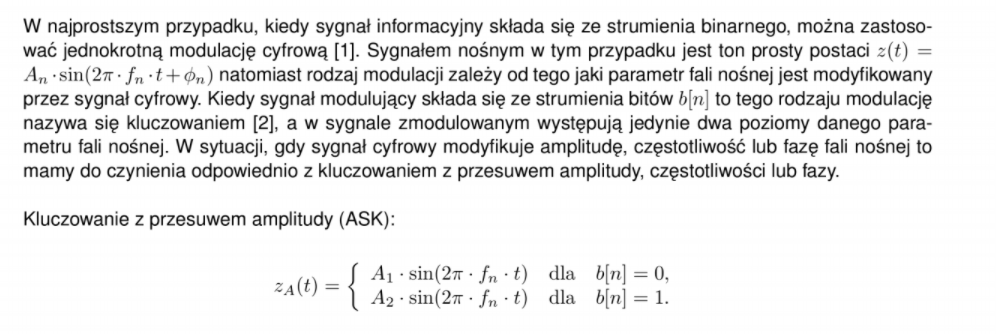

In [4]:
#czestotliowsci
f_m = 200
f_n = 500
#czas
T = 2
#amplituda
A_n = 2
#kat
phi_n = pi/8
#funkcja opisujaca sygnal
funkcja_m = lambda t: A_n*sin(2*pi*f_n*t + phi_n)
m = generate_signal(funkcja_m, f_m, T)

In [5]:
#losowy kod ASCII
import random
kod = []
_len = T

for i in range(_len):
  kod.append(random.randint(32,127))

In [6]:
kod

[116, 49]

In [7]:
def decimalToBinary(n,bits=7):
  ''' Transformacja zapisu dziesietnego do binarnego pojedynczego znaku'''
  zeros = [0 for _ in range(bits)]
  result = [int(digit) for digit in bin(n).replace("0b", "")]
  n = len(result)
  zeros[-n:] = result
  return zeros

In [8]:
def to_binary(kod):
  ''' Transformacja calego kodu'''
  result = []
  for number in kod:
    result.extend(decimalToBinary(number))
  return result

In [9]:
#dlugosc kodu
len(to_binary(kod))

14

In [10]:
#dobieramy parametry
#czas
T = 5
#liczba bitow sygnalu informacyjnego
B = 82
T_b = T/ B

#losowy kod
import random
kod = []
_len = T


for i in range(_len):
  kod.append(random.randint(32,127))

#amplitudy
A_1 = 1
A_2 =2

W = 5

f_n = W/T_b

In [11]:
#czestotliowsci obliczone zgodnie ze wzoramni
f_n1 = (W +1)/T_b
f_n2 = (W +2)/T_b

In [12]:
def ASK(sygnal_modulujacy):
  '''Funkcja wykonujaca modulacje ASK'''
  sygnal = []
  #wzor modulacji
  funkcja = lambda t, A_n: A_n*sin(2*pi*f_n*t + phi_n)
  for n, b in zip(range(int(T*f_s)), sygnal_modulujacy):
    if b ==0:
      sygnal.append(funkcja(n/f_s, A_1))
    if b ==1:
      sygnal.append(funkcja(n/f_s, A_2))
  return sygnal


In [13]:
A_1 = 1
A_2 = 1

In [14]:
#modulacja losowego kodu
ASK(to_binary(kod))

[0.3826834323650898,
 0.44134924494010264,
 0.4981851053394908,
 0.5529553568637499,
 0.6054329073810013,
 0.6554001709117938,
 0.7026499697988492,
 0.7469863937211176,
 0.78822561199044,
 0.8261966357628151,
 0.8607420270039435,
 0.8917185512694839,
 0.9189977715934213,
 0.9424665810221279,
 0.9620276715860858,
 0.9775999377647906,
 0.9891188127719618,
 0.9965365362667313,
 0.999822352380809,
 0.9989626372405491,
 0.9939609554551797,
 0.9848380453369782,
 0.971631732914674,
 0.9543967750966027,
 0.9332046326338986,
 0.9081431738250815,
 0.8793163101905564,
 0.8468435656276209,
 0.8108595808323734,
 0.7715135550433286,
 0.7289686274214118,
 0.6834012006313066,
 0.6350002094287609,
 0.5839663372864868,
 0.530511184306734]

Text(0.5, 1.0, 'Wykres modulacji kodu ASK')

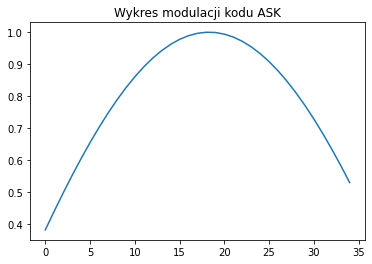

In [15]:
len_ = len(ASK(to_binary(kod)))
plt.plot(range(len_), ASK(to_binary(kod)))
plt.title("Wykres modulacji kodu ASK")

In [16]:
#Szerokosc parma 3, 6 ,12:
print(szerokosc_pasma(range(len_), ASK(to_binary(kod)), 3))
print(szerokosc_pasma(range(len_), ASK(to_binary(kod)), 6))
print(szerokosc_pasma(range(len_), ASK(to_binary(kod)), 12))

18
24
30


Text(0.5, 1.0, 'Wykres modulacji ASK kodu wariant drugi')

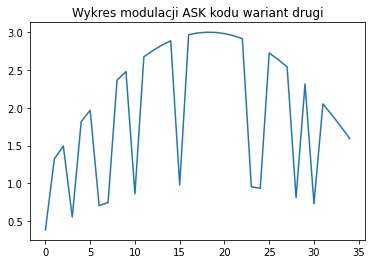

In [17]:
A_1 = 1
A_2 = 3

plt.plot(range(len_), ASK(to_binary(kod)))
plt.title("Wykres modulacji ASK kodu wariant drugi")

In [18]:
def PSK(sygnal_modulujacy):
  '''Funkcja wykonujaca modulacje PSK'''
  sygnal = []
  funkcja = lambda t, phi_n: sin(2*pi*f_n*t + phi_n)
  for n, b in zip(range(int(T*f_s)), sygnal_modulujacy):
    if b ==0:
      phi_n = 0
      sygnal.append(funkcja(n/f_s, phi_n))
    if b ==1:
      phi_n = pi
      sygnal.append(funkcja(n/f_s, phi_n))
  return sygnal

Text(0.5, 1.0, 'Wykres modulacji PSK')

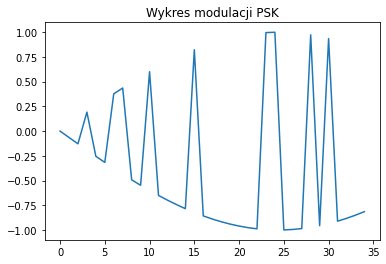

In [19]:
plt.plot(range(len_), PSK(to_binary(kod)))
plt.title("Wykres modulacji PSK")

In [20]:
#Szerokosc parma 3, 6 ,12:
print(szerokosc_pasma(range(len_), PSK(to_binary(kod)), 3))
print(szerokosc_pasma(range(len_), PSK(to_binary(kod)), 6))
print(szerokosc_pasma(range(len_), PSK(to_binary(kod)), 12))

21
25
29


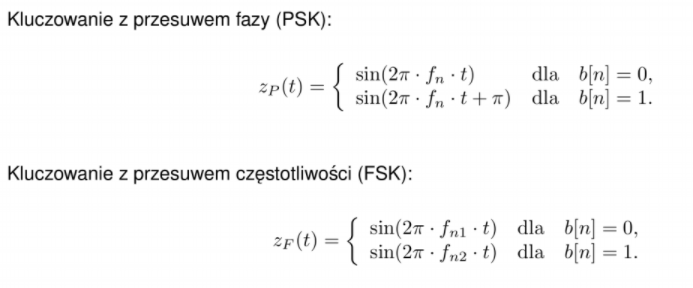

In [21]:
def FSK(sygnal_modulujacy):
  '''Funkcja wykonujaca modulacje FSK'''
  sygnal = []
  funkcja = lambda t, f_n: sin(2*pi*f_n*t )
  for n, b in zip(range(int(T*f_s)), sygnal_modulujacy):
    if b ==0:
      f_n = f_n1
      sygnal.append(funkcja(n/f_s, f_n))
    if b ==1:
      f_n = f_n2
      sygnal.append(funkcja(n/f_s, f_n))
  return sygnal

Text(0.5, 1.0, 'Wykres modulacji FSK')

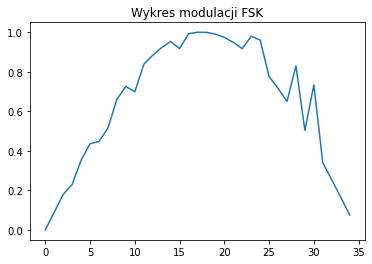

In [22]:
plt.plot(range(len_), FSK(to_binary(kod)))
plt.title("Wykres modulacji FSK")

In [23]:
#Szerokosc parma 3, 6 ,12:
print(szerokosc_pasma(range(len_), FSK(to_binary(kod)), 3))
print(szerokosc_pasma(range(len_), FSK(to_binary(kod)), 6))
print(szerokosc_pasma(range(len_), FSK(to_binary(kod)), 12))

15
21
28


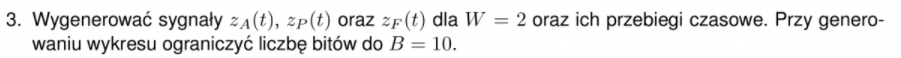

In [24]:
W = 2
#liczba bitow
B = 10
#czas trwania bitu
T_b = T/ B

#kod
kod = []
for i in range(_len):
  kod.append(random.randint(32,127))

#amplitudy
A_1 = 1
A_2 =2

W = 5
#czestotliwosc
f_n = W/T_b

Text(0.5, 1.0, 'Wykres modulacji kodu ASK')

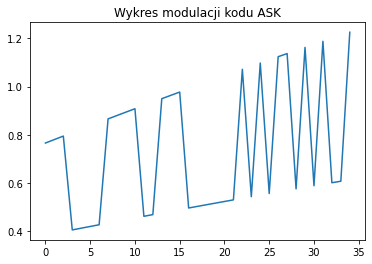

In [25]:
plt.plot(range(len_), ASK(to_binary(kod)))
plt.title("Wykres modulacji kodu ASK")

Text(0.5, 1.0, 'Wykres modulacji kodu FSK')

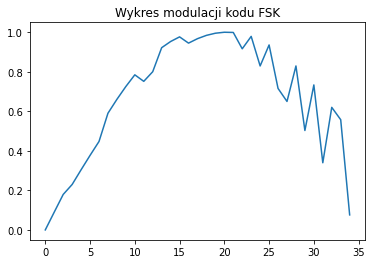

In [26]:
plt.plot(range(len_), FSK(to_binary(kod)))
plt.title("Wykres modulacji kodu FSK")

Text(0.5, 1.0, 'Wykres modulacji kodu PSK')

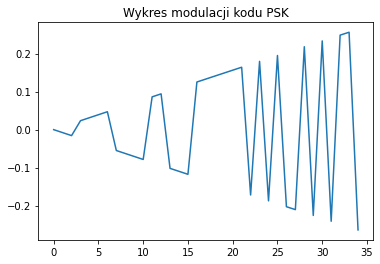

In [27]:
plt.plot(range(len_), PSK(to_binary(kod)))
plt.title("Wykres modulacji kodu PSK")

In [28]:
Widmo_y = widmo_amplitudowe(fft(PSK(to_binary(kod)))[:int(35/2 - 1)])
# Widmo_z = widmo_amplitudowe(DFT_z[:int(len(DFT_z)/2 - 1)])
# Widmo_v = widmo_amplitudowe(DFT_v[:int(len(DFT_v)/2 - 1)])

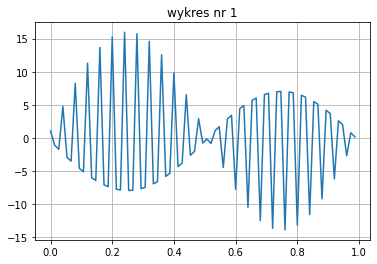

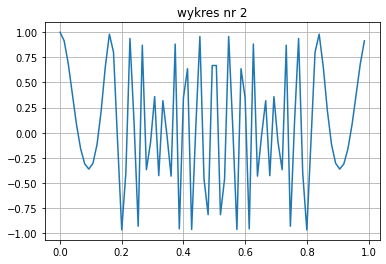

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


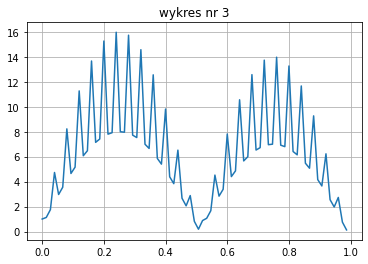

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


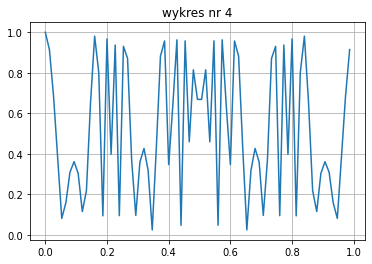

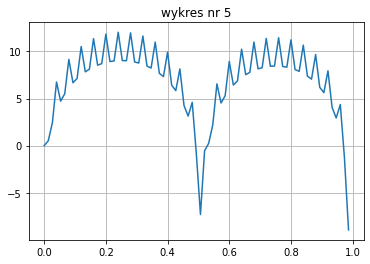

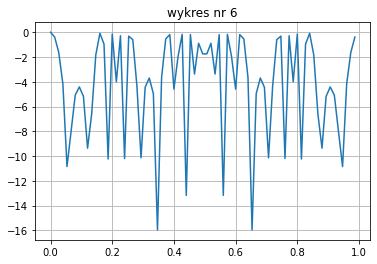

Wza: 20.975202
Wzp: 15.963458


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math


#definicje sygnalow z tabeli
def m(n,fs):
    Am=30
    fm=1
    m=Am*np.sin(2*np.pi*fm*n/fs)                             #t=n/fs
    return m

def za(n,fs):   
    ka=0.5
    #ka=6
    #ka=30
    fn=500
    za=(ka*m(n,fs)+1)*np.cos(2*np.pi*fn*n/fs)
    return za

def zp(n,fs):
    kp=1
    #kp=2
    #kp=50
    fn=500  
    zp=np.cos(2*np.pi*fn*n/fs+kp*m(n,fs))
    return zp

def M(z,N):
    output=[]
    for k in range(0,N):
        M=complex(0)
        M=M+np.sqrt(np.real(np.power(z[k],2))+np.imag(np.power(z[k],2))*1j)
        output.append(M)
        # print(k)
    return output

def M2(z,N):
    output=[]
    for k in range(0,N):
        M2=complex(0)
        M2=M2+np.sqrt(np.real(np.power(z[k],2))+np.imag(np.power(z[k],2))*1j)
        output.append(M2)
        # print(k)
    for i in range(0,N):
        output[i]=10*np.log10(np.abs(output[i]))
    return output

#Widma amplitudowe sygnalow

tab=np.linspace(0,74,75)
fs=75

plt.plot(tab/fs, za(tab,fs))
plt.grid()
plt.title('wykres nr 1')
plt.show()

plt.plot(tab/fs, zp(tab,fs))
plt.grid()
plt.title('wykres nr 2')
plt.show()

za=za(tab,fs)
plt.plot(tab/fs, M(za,fs))
plt.grid()
plt.title('wykres nr 3')
plt.show()

zp=zp(tab,fs)
plt.plot(tab/fs, M(zp,fs))
plt.grid()
plt.title('wykres nr 4')
plt.show()

plt.plot(tab/fs, M2(za,fs))
plt.grid()
plt.title('wykres nr 5')
plt.show()

plt.plot(tab/fs, M2(zp,fs))
plt.grid()
plt.title('wykres nr 6')
plt.show()

fminza = min(M2(za,fs))
fmaxza = max(M2(za,fs))
Wza = fmaxza - fminza


fminzp = min(M2(zp,fs))
fmaxzp = max(M2(zp,fs))
Wzp = fmaxzp - fminzp

print("Wza: %f" % Wza)
print("Wzp: %f" % Wzp)
